# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation 
4. Features
5. Modelling 
6. Experimentation 

## 1. Problem Definition 

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the [Cleveland data](https://archive.ics.uci.edu/ml/datasets/heart+Disease) form the UCI Machine Learning Repository

There is also a verson of it available on Kaggle. [Link for the dataset](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset)


## 3. Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features

This is where you will get different information about each of the features in your data.

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib, and NumPy for data analysis and manipulation 

In [1]:
# Import the tools we need

# Regular EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-learn (we are dealing with classficiation type so we are only going to import the classificaiton modules)
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay



## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape # (rows,columns)

(303, 14)

## Data Exploration (EDA)

The goal here is to find more about the data and become SME on the dataset 

1. What questions are we trying to solve?
2. What kind of data do we have and how dow we different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Let us find out the how many of each class we have
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

Since both of the classes are close to even this is **balanced** dataset

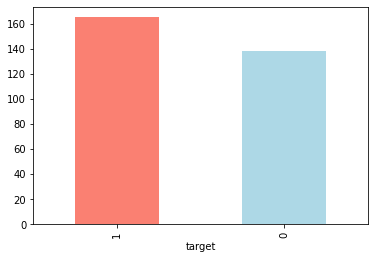

In [5]:
df['target'].value_counts().plot(kind='bar', color= ['salmon','lightblue']);

`df.info()` shows us a quick insight to the number of missing values and what type of data we are working with 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Check for the missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

`df.describe()` shows us a range of different metrics about our numerical columns such as mean, max and standard deviation 

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequencey according to Sex

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

Our dataset has more males than females based on `value_counts()` for the column `sex`

In [10]:
# Compare target column with sex column 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


There is some information here and what can we infer from this.

Since there are about 100 females and 72 of them have a positive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there is a 75% chance she has heart disease

As for males, there is about 200 total with around half indicating a presence of hearet disease. So we might predict, if the participant is male, 50% of the time he will have heart disease

Averaging theses tow values, we can assume, bsed on no other parameters, if there's a person, there's a 62.5% chance that they have heart disease

This can be our very simple **baseline**, but let us see what will we get from modeling 

### Make our cross tab visual


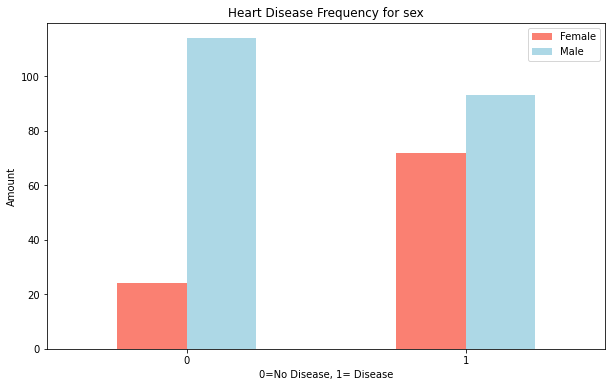

In [11]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon','lightblue'])

plt.title('Heart Disease Frequency for sex')
plt.xlabel('0=No Disease, 1= Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation =0);

### Age vs Max Heart Rate for Heart Disease

Let's try cobining a couple of independent variables such as `age` and `thalach` (maximum heart rate) and then comparing them to our target vaiable `heart disease`

Because there are so many different values for `age` and `thalach`, we'll use a scatter plot

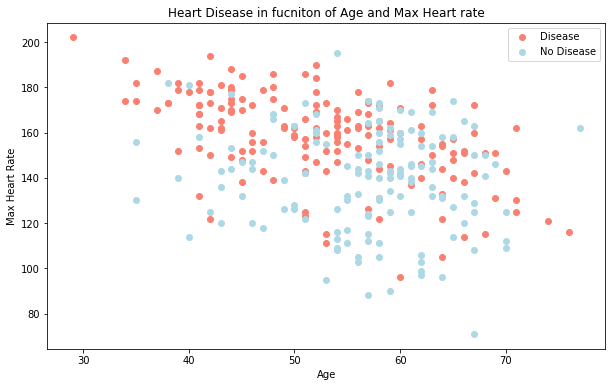

In [12]:
# Create anotoher figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')

# Add some helpful info
plt.title('Heart Disease in fucniton of Age and Max Heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

What can we infer from this?


It seems the younger someone is, the higher their max heaert rate(dots are higher on the left of the graph) and the older someone is, the more green dots there are, but this may be because there are more dots all together on the right side of the graph (older participants).

Both of these observational of course, but this what we're trying to do, build an understanding of the data

Let's check the age **distribution**

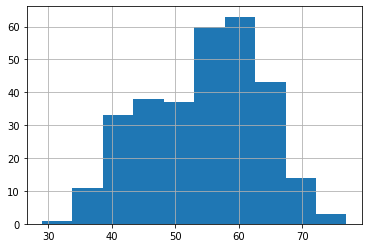

In [13]:
df.age.hist();

We can see it is a **normal distribution** but slightly swaying to the right, which reflects in the scatter plot abve.

### Heart Disease Frequency per Chest Pain Type

Let us try another independent variable `cp` (chest pain)



In [14]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


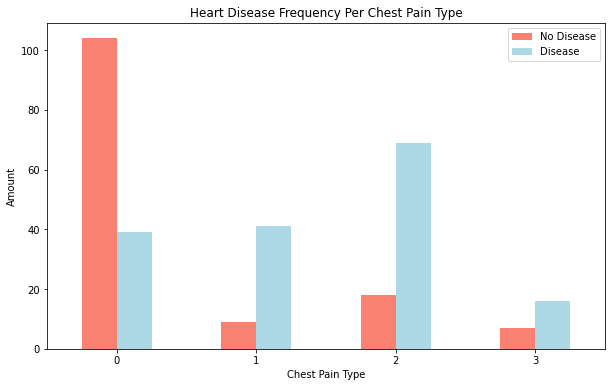

In [15]:
# Make the cross tab more visual 
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                 color=['salmon','lightblue'])

# Add some communication 
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

What can we infer from this ?


From the data dictionary the different levels of chest pain are

cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease

It is interesting the atypical agina (value 1 ) states it's not related to the heart but it seems to have higher ratio of participants with heart disease than not.


What does atypical agina even mean?

At this point, it's important to remember, if your data dictionary doesn't supply you enough information, you may want to do further research on your values. This research may come in the form of asking a **subject matter expert** (such as a cardiologist or the person who gave you the data) or Googling to find out more.

Acoording to PubMed, it seems [even some medical professionals are confused by the term](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/)

> Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.


Although not conclusive, this graph above is a hint at the confusion of defination being represented in data


### Correlation between independent variables

Finally we'll compare all of the independent variables in one hit, so that this method will give an idea of which independent variables may or may not have an imapct on our target variable.

We can do this using `df.corr()` which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is to other


In [16]:
# Make a correlation matrix

df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


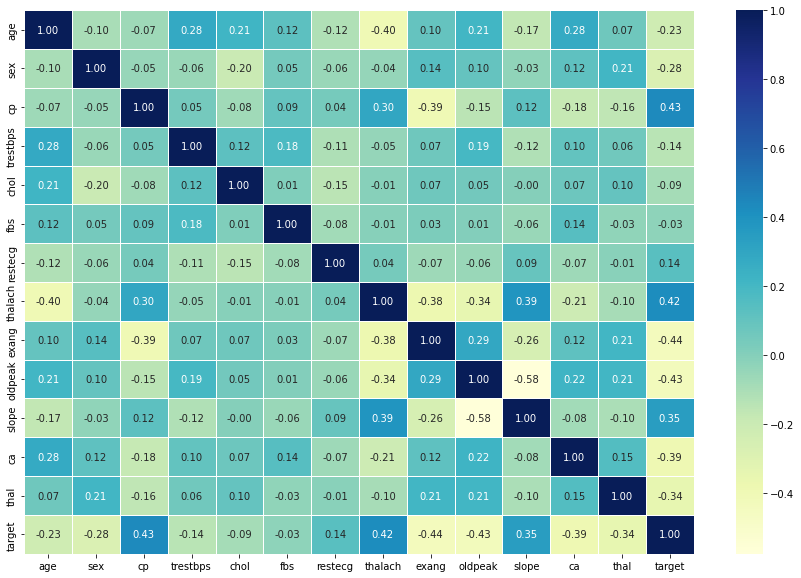

In [17]:
# Let's make our correlation matrix a little prettier

corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt='.2f',
                cmap='YlGnBu');



A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease)

## 5 Modeling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables 

Our problem is 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That is what we are trying to answer

But before we build a model, let us get our dataset ready


In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We know that the column `target` is the column we want to predict and rest all columns are independent which will help us to predict or classify the target 

In [23]:
# Split the data into X and y
X= df.drop('target',axis=1)
y= df['target']


In [24]:
X # Independent variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y # Targets 

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Training and test split

One of the most important part in machine learning is the **training/testing split**

This is where we will split our data into a **training set** and a **test set**

We use our training set to train our model and the test set must remain seperate from training set

To split the data into a training and testing set, we can use Scikit-Learn's `train_test_split()` and feed it our independent and dependent variables (`X` & `y`)

In [26]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2)

We are using 80% of our data to train the model and 20% of the remaining data for testing the model. this is done by the `test_size` parameter in `train_test_split()` 

In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [28]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

We have 242 samples for train data and rest are for testing data which is 61

### Model choices

Now we have our training and testing datasets it is time to build a mahcine learning model

Let us try these 3 different models
1. Logistic regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

All of the algoriths in the Scikit-Learn library use the same functions, for training a model, `model.fit(X_train,y_train)` and for scoring a model `model.score(X_test,y_test).score()` returns the ratio of correct predictions (1.0 = 100% correct)


Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating the,, let's put them in a dictionary and create a function which fits and scores them

In [32]:
# Put models in a dictionary

models = {'Logistic Regression':LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}


# Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels 
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the odel and append its score to mdoel_score
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [35]:
model_scores = fit_and_score(models = models,
             X_train = X_train,
             X_test = X_test,
             y_train = y_train,
             y_test = y_test)

model_scores

c:\users\choll\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

We've got the scores for our models we instanciated **without tuning** and let us compare them visually

## Model Comparison

Since we've saved our models score to a dictionary. we can plot them by first converting them to a DataFrame

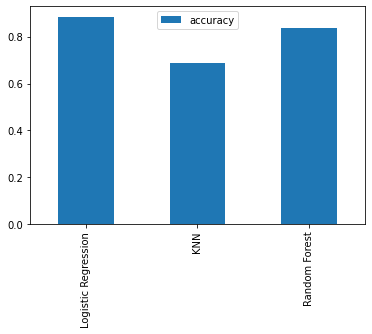

In [36]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

We can't really see it from the graph but looking at the dictionary, the **LogisticRegression()** model performs best

But is the best we can do ? What are the parameters we can change in the models so that it might perform better and which results in passing our evaluation metric

Now we've got a baseline model... and we know a model's first predictions aren't always what we shuold based our next steps off. What should we do?


Let's look at the following 
* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance**- If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* **Confusion Matrix**- Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* **Cross-validation**- Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* **Precision**- Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* **Recall**- Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* **F1 Socre**- Combines precision and recall into one metric. 1 is best, 0 is worst.
* **Classification report**- Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* **ROC Curve**- [Receiver Operating Characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* **Area under the curve (AUC)**-  The area underneath the ROC curve. A perfect model achieves a score of 1.0.

## Hyperparameter tuning (by hand)


In [37]:
#Let's tune KNN

train_scores=[]
test_scores=[]

# Create a list of different values for n_neighbors

neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the model (Train)
    knn.fit(X_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [38]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [39]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.41%


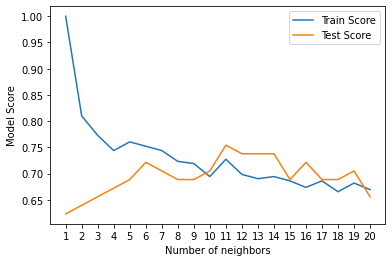

In [42]:
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors, test_scores,label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data : {max(test_scores)*100:.2f}%')

Looking at the graph, `n_neighbors=11` seems besst.

Even knowing this, the `KNN'S` model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this we'll discard `KNN` and focus on the other two.

We've tuned `KNN` by hand but let's see how we can tune `LogisticRegression` and `RandomForestClassifier` using `RandomizedSearchCV`

Instead of us having to manually try different hyperparameters by hand, `RandomizedSeaerchCV` tries a number of different combinations, evaluates them and saves the best



## Tuning models with `RandomizedSearchCV`

We're going to tune:
1. Logistic Regression 
2. Random Forest Classifier
..... using `RandomizedSearchCV`




Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [57]:
# Create a hyperparameter grid for Logistic Regression 
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver": ['liblinear']}



# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators':np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

Now we've got hyperparameters grid setup for each of our models, let's tune them using `RandomizedSearchCV` and tune our `LogisticRegressionModel`


We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter=20`. This means `RandomizedSeachCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [58]:
# Set the random seed
np.random.seed(42)

# Setup random hyperparameters search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# Fit random hyperparameters search model for LogisticRegression 
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [59]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [60]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tuned for `Logisticregression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`

In [61]:
# Set the random seed
np.random.seed(42)

# Setup random hyperparameters search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                               cv=5,
                              n_iter=20,
                              verbose=True)

# Fit random hyparameters search model
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [62]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [63]:
# Evalaute the randomized search RandomClassifierModel

rs_rf.score(X_test,y_test)

0.8688524590163934

Tuning the hyperparameters for each model saw a slight performance boost in both the `RandomForestClassifier` and `LogisticRegression`.

This is akin to tuning the settings on your oven and getting it to cook your favourite dish just right.

But since `LogisticRegression` is pulling out in front, we'll try tuning it further with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

### Tuning a model with `GridSearchCV`

The difference betwwen `RandomizedSearchCV` and `GridSearchCV` is where `RadnomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination

In short:

* `RandomizedSearchCV` - tries `n_iter` combinations of hyperparameters and saves the best
* `GridSearchCV` - tries ever single combination of hyperparameters and saves the best

In [64]:
# Different hyperparameters for our LogisticRegression Model
log_reg_grid = {'C': np.logspace(-4,4,30),
               'solver':['liblinear']}


# Setup gird hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         cv=5,
                         param_grid = log_reg_grid,
                         verbose = True)

# Fit grid hyperparameter search model 
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [65]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [66]:
# Evaluate the grid search LogisticRegression Model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [67]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations 


**Note**: If there are a large amount of hyperparameters combinations in your grid, `GridSearchCV` may take a long time to try them all out. This is why it's a good idea to start with `RandomizedSearchCV`, try a certain amount of combinations and then use GridSearchCV to refine them.

## Evaluating a classification model, beyond accuracy


Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:

* ROC Curve and AUC Score - `RocCurveDisplay()`
    * **Note** - This was previously `sklearn.metrics.plot_roc_curve()`, as of Scikit-Learn version 1.2+, it is `sklearn.metrics.RocCurveDisplay()`.
* Confusion matrix - `confusion_matrix()`
* Classification report - `classification_report()`
* Precision - `precision_score()`
* Recall - `recall_score()`
* F1-Score - `f1_score()`


To access them, we'll have to use our model to make predictions on the test set. You can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.

In [68]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [69]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### ROC Curve

What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

With `RocCurveDisplay` we can have ROC curve as well as calculate the area under the curve (AUC) metric

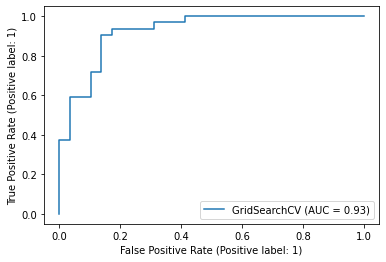

In [71]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test);

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

Let's move onto the next evaluation request, a confusion matrix.

### Confusion matrix
A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using `confusion_matrix()` and passing it the true labels and predicted labels

In [72]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


Let us try to make the confusion matrix visual by Seaborn's `heatmap()`

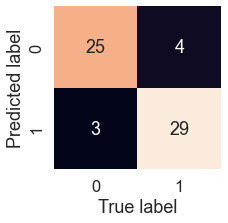

In [74]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    

plot_conf_mat(y_test,y_preds)

The model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 4 occasaions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

### Classification report

We can make a classification report using `classification_report()` and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [78]:
from sklearn.metrics import classification_report

# Show classification report 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Let us get an indea what are the defiantions for these parameters on classification report

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

### Calculate evaluation metrics using cross-validation



In [79]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [80]:
# Create a new classfifer with best parameters 
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [81]:
# Cross-validated accuracy 
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')

In [82]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [83]:
# Cross validated precision
cv_pre = cross_val_score(clf,X,y,cv=5,scoring='precision')

cv_pre=np.mean(cv_pre)
cv_pre

0.8215873015873015

In [84]:
# Cross validated recall

cv_rec = cross_val_score(clf,X,y,cv=5,scoring='recall')

cv_rec = np.mean(cv_rec)
cv_rec

0.9272727272727274

In [85]:
# Cross Validated f1-score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

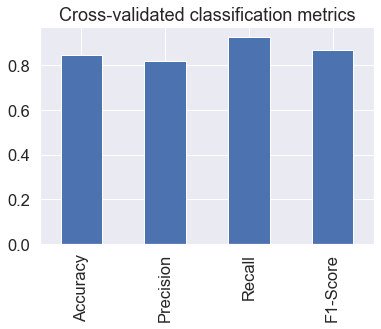

In [87]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                          'Precision':cv_pre,
                          'Recall':cv_rec,
                          'F1-Score':cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                     legend=False);

## Feature Importance

Feature Importance is another wy of asking **Which features contributed most to the outcomes of the model and how did they contribute?**

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for it on Google 

Finding Feature Importance is different for each machine learning model 

In [90]:
# FIt an instance of LogisticRegression 
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear'
                        )

clf.fit(X_train,y_train);

In [91]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044675,  0.66067032, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.5686279 ,
         0.45051633, -0.63609907, -0.67663375]])

In [93]:
# Matching coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830677295966,
 'sex': -0.8604467464181768,
 'cp': 0.6606703196786501,
 'trestbps': -0.011569931725970527,
 'chol': -0.0016637456109837993,
 'fbs': 0.04386101205953376,
 'restecg': 0.3127586484717099,
 'thalach': 0.024593615841597527,
 'exang': -0.6041309444844618,
 'oldpeak': -0.5686278978594388,
 'slope': 0.45051632904765737,
 'ca': -0.6360990721560912,
 'thal': -0.67663374706138}

In [95]:
# Visualize the frature mportance 
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312759,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


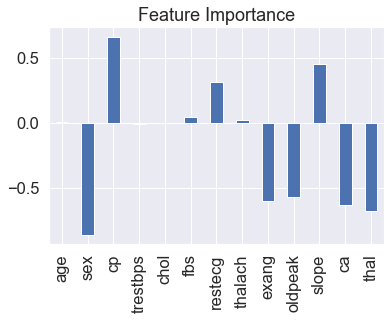

In [97]:
feature_df.T.plot.bar(title="Feature Importance", legend = False);

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the `sex` attribute has a negative value of -0.904, which means as the value for sex increases, the `target` value decreases.

We can see this by comparing the `sex` column to the `target` column.

In [98]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when `sex` is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (`target` = 1) than without.

And then as `sex` increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

## 6. Experimentation

We've completed all the metrics your boss requested. You should be able to put together a great report containing a confusion matrix, a handful of cross-valdated metrics such as precision, recall and F1 as well as which features contribute most to the model making a decision.


Our Evaluation Metric 
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

So what can we do more???

* Could you collect more data?

* Could you try a better model? If you're working with structured data, you might want to look into CatBoost or XGBoost.

* Could you improve the current models (beyond what we've done so far)?

* If your model is good enough, how would you export it and share it with others?